In [47]:
import importlib
import src.utils as utils
import src.gtfs_handler as gtfs_handler
import src.gps_handler as gps_handler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numba import jit

importlib.reload(utils)
importlib.reload(gtfs_handler)
importlib.reload(gps_handler)


<module 'src.gps_handler' from 'c:\\Users\\almir\\OneDrive\\Área de Trabalho\\FGV\\5° Período\\Field\\smtr_previsao_tempo_chegada\\fgv\\src\\gps_handler.py'>

In [48]:
# Define the paths to the GTFS and GPS data
GTFS_FOLDER = "./data/gtfs_data"
GPS_FOLDER = "./data/gps_data"

# Define the route to be analyzed
ROUTE = "409"

In [49]:
# Create the GTFS and GPS handlers
gtfs = gtfs_handler.GTFSHandler(GTFS_FOLDER)
gps = gps_handler.GPSHandler(GPS_FOLDER)

GTFS data loaded successfully!
Loading GPS data from 1 CSV files...
GPS data loaded successfully!


In [50]:
gtfs.filter_by_route(ROUTE)

print("Route stops:")
gtfs.route_stops

Route stops:


,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


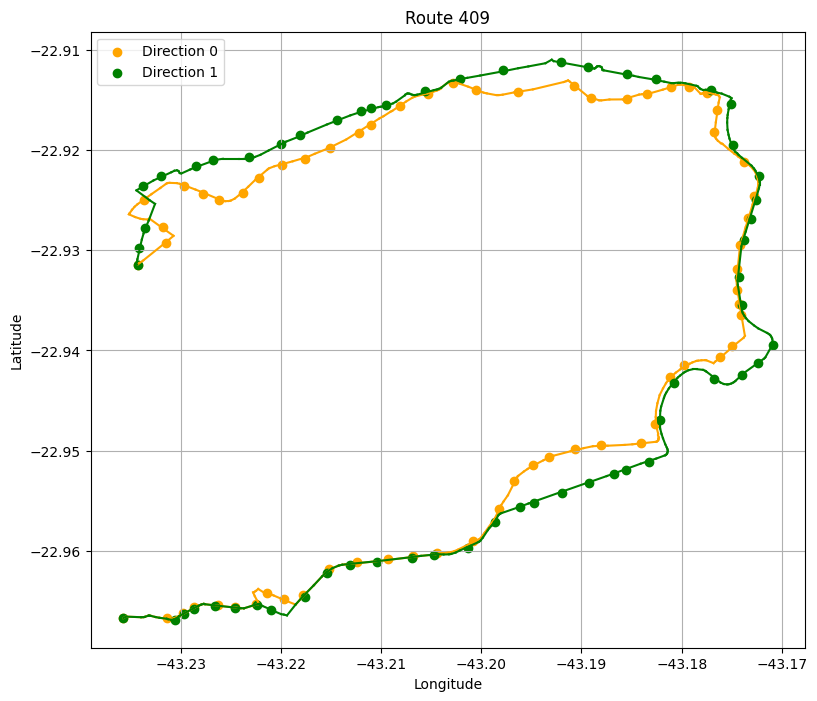

In [51]:
# Plot the route and the stops, colored by the direction
gtfs.plot_route("Route 409")

In [52]:
gps.show_buses()

id_veiculo
A71546    14340
A71545     6926
A71518     2969
A71587     2692
A71515     2643
A71577     2590
A71505     2580
A71531     2559
A71551     2530
A71565     2510
A71533     2459
A71509     2432
A71576     2422
A71503     2376
A71541     2361
A71522     2358
A71502     2319
A71550     2299
A71555     2161
A71527     2160
A71579     2157
A71508     2126
A71553     1380
A71584      282
A71540      194
A71589      133
A71552      121
A71519      117
A71566       88
A71528       86
A71537       75
A71523       41
Name: count, dtype: int64


In [53]:
# Filter the data according to the vehicle id
gps.get_bus_data("A71505")
gps.gps_df

,modo,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_operacao,flag_em_movimento,tipo_parada,flag_linha_existe_sigmob,flag_trajeto_correto,flag_trajeto_correto_hist,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,versao
36161,SPPO,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,False,garagem,False,False,False,Parado garagem,0,0.0,NaN,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
7169,SPPO,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,False,garagem,False,False,False,Parado garagem,0,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
15,SPPO,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,False,garagem,False,False,False,Parado garagem,0,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
43358,SPPO,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,False,garagem,False,False,False,Parado garagem,0,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
43353,SPPO,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,False,garagem,False,False,False,Parado garagem,0,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,SPPO,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,False,garagem,False,False,False,Parado garagem,15,2.7,11.380338,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
66480,SPPO,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,False,True,garagem,False,False,False,Operando fora trajeto,18,3.3,14.384594,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
8233,SPPO,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,False,True,garagem,False,False,False,Operando fora trajeto,0,3.4,17.755114,cff6b6680628d6addf7ddc09c0a0a154835e0ffe
58015,SPPO,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,False,garagem,False,False,False,Parado garagem,0,0.0,2.331091,cff6b6680628d6addf7ddc09c0a0a154835e0ffe


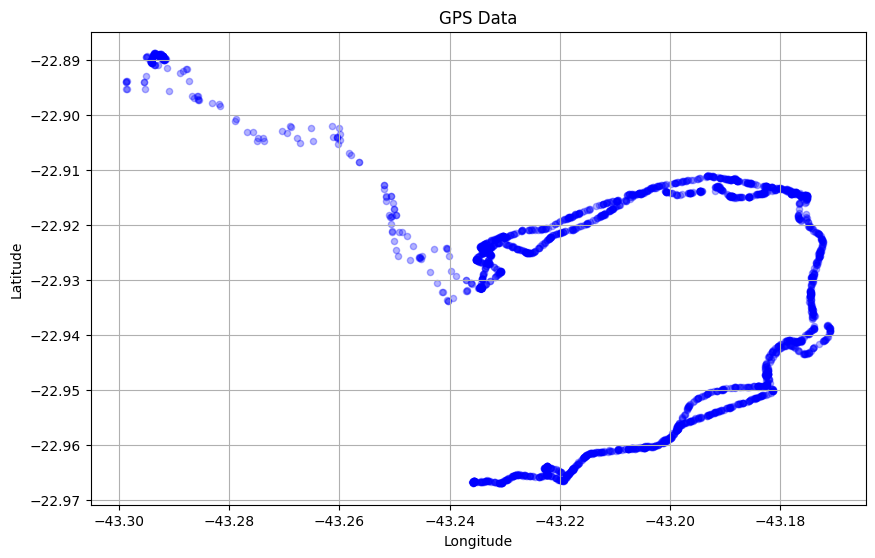

In [54]:
# Plot the gps data as a scatter plot
gps.plot_gps_data()

In [55]:
print(f"EVALUATING {len(gps.gps_df)} gps points over {len(gtfs.route_shape_segments)} route segments")
gps.filter_gps_coordinates(gtfs)
gps.gps_df

print("\nRESULTS AFTER FILTERING")
print(gps.gps_df["in_route"].value_counts())

EVALUATING 2580 gps points over 613 route segments

RESULTS AFTER FILTERING
in_route
True     2355
False     225
Name: count, dtype: int64


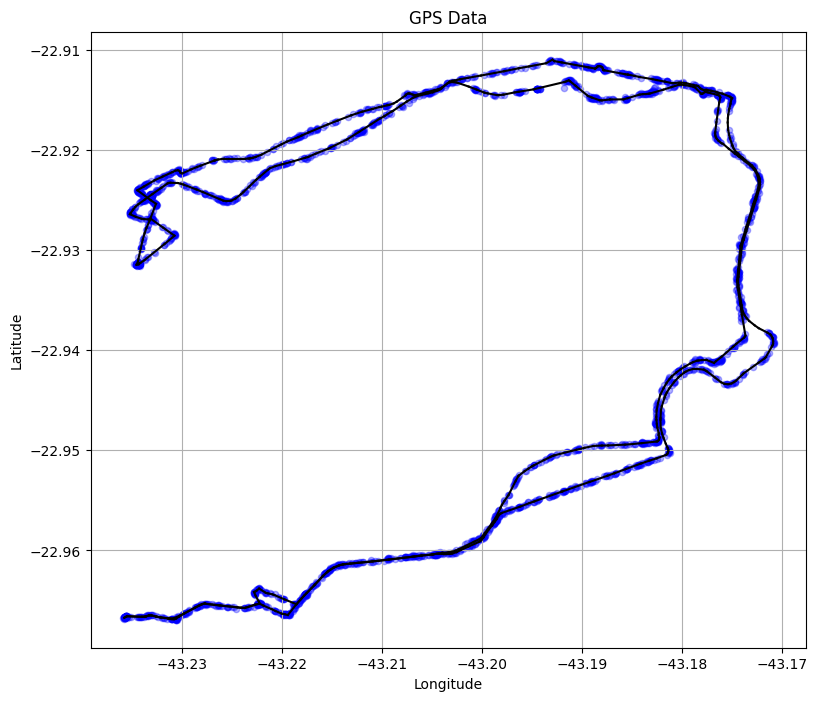

In [56]:
gps.plot_gps_data(gps.gps_df[gps.gps_df["in_route"] == True], gtfs.route_shape_segments)

In [57]:
gps.gps_df[gps.gps_df["in_route"] == True]

,modo,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_operacao,flag_em_movimento,...,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,versao,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route
44384,SPPO,2024-02-22 05:21:00,2024-02-22,05:21:00,A71505,409,-22.93147,-43.23429,False,True,...,Operando fora trajeto,0,60.0,188.409359,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7.024907,0,7.766971,313,True
44319,SPPO,2024-02-22 05:21:21,2024-02-22,05:21:21,A71505,409,-22.93147,-43.23429,False,True,...,Operando fora trajeto,0,60.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7.024907,0,7.766971,313,True
44471,SPPO,2024-02-22 05:24:01,2024-02-22,05:24:01,A71505,409,-22.93149,-43.23429,False,True,...,Operando fora trajeto,0,24.4,2.223902,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,8.948439,0,9.149776,313,True
15656,SPPO,2024-02-22 05:24:19,2024-02-22,05:24:19,A71505,409,-22.93145,-43.23428,False,True,...,Operando fora trajeto,6,23.1,4.564175,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,5.710923,0,7.924648,313,True
22802,SPPO,2024-02-22 05:24:49,2024-02-22,05:24:49,A71505,409,-22.93018,-43.23274,False,True,...,Operando fora trajeto,26,23.3,211.694082,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,2.120983,4,155.147725,310,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66318,SPPO,2024-02-22 21:57:07,2024-02-22,21:57:07,A71505,409,-22.93128,-43.23447,False,True,...,Operando fora trajeto,9,15.1,18.326329,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,21.564258,0,3.230586,312,True
59117,SPPO,2024-02-22 21:57:22,2024-02-22,21:57:22,A71505,409,-22.93140,-43.23453,False,True,...,Operando fora trajeto,5,14.4,14.690167,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,20.642301,0,3.704138,312,True
1049,SPPO,2024-02-22 21:57:24,2024-02-22,21:57:24,A71505,409,-22.93144,-43.23456,False,True,...,Operando fora trajeto,8,14.1,5.405695,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,23.354907,0,4.651680,312,True
30094,SPPO,2024-02-22 21:57:26,2024-02-22,21:57:26,A71505,409,-22.93145,-43.23461,False,True,...,Operando fora trajeto,10,13.9,5.239723,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,29.346318,0,10.235805,312,True


In [58]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [59]:
gtfs.route_shapes

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
197560,gnoq,1,-22.93143,-43.23435,0.00
197561,gnoq,2,-22.93139,-43.23428,8.44
197562,gnoq,3,-22.93133,-43.23424,16.27
197563,gnoq,4,-22.93128,-43.23414,27.92
197564,gnoq,5,-22.93101,-43.23374,78.70
...,...,...,...,...,...
344912,wrbl,311,-22.92982,-43.23409,18704.27
344913,wrbl,312,-22.93090,-43.23433,18826.85
344914,wrbl,313,-22.93113,-43.23437,18852.75
344915,wrbl,314,-22.93146,-43.23452,18892.53


In [60]:
gps.get_distance_from_start(gtfs)

gps.gps_df

,modo,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_operacao,flag_em_movimento,...,velocidade_estimada_10_min,distancia,versao,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route,distance_from_start_0,distance_from_start_1
36161,SPPO,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,False,...,0.0,NaN,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
7169,SPPO,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,False,...,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
15,SPPO,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,False,...,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
43358,SPPO,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,False,...,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
43353,SPPO,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,False,...,0.0,0.000000,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,SPPO,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,False,...,2.7,11.380338,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7635.269518,13,7564.972850,302,False,1030.199951,17942.060547
66480,SPPO,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,False,True,...,3.3,14.384594,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7621.428047,13,7550.873646,302,False,1030.199951,17942.060547
8233,SPPO,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,False,True,...,3.4,17.755114,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7602.705458,13,7532.106406,302,False,1030.199951,17942.060547
58015,SPPO,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,False,...,0.0,2.331091,cff6b6680628d6addf7ddc09c0a0a154835e0ffe,7603.901653,13,7533.374960,302,False,1030.199951,17942.060547


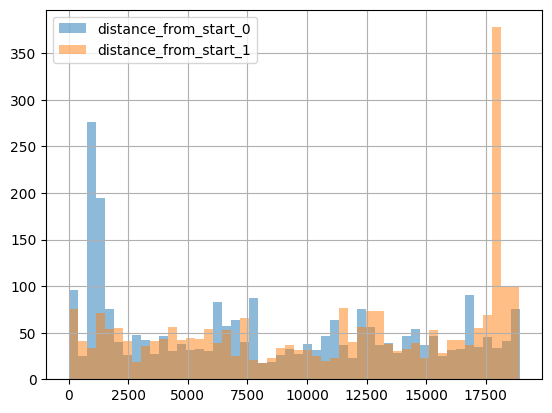

In [61]:
# Plot a histogram of distance_from_start_0 and distance_from_start_1
gps.gps_df["distance_from_start_0"].hist(bins=50, alpha=0.5, label="distance_from_start_0")
gps.gps_df["distance_from_start_1"].hist(bins=50, alpha=0.5, label="distance_from_start_1")
plt.legend()
plt.show()

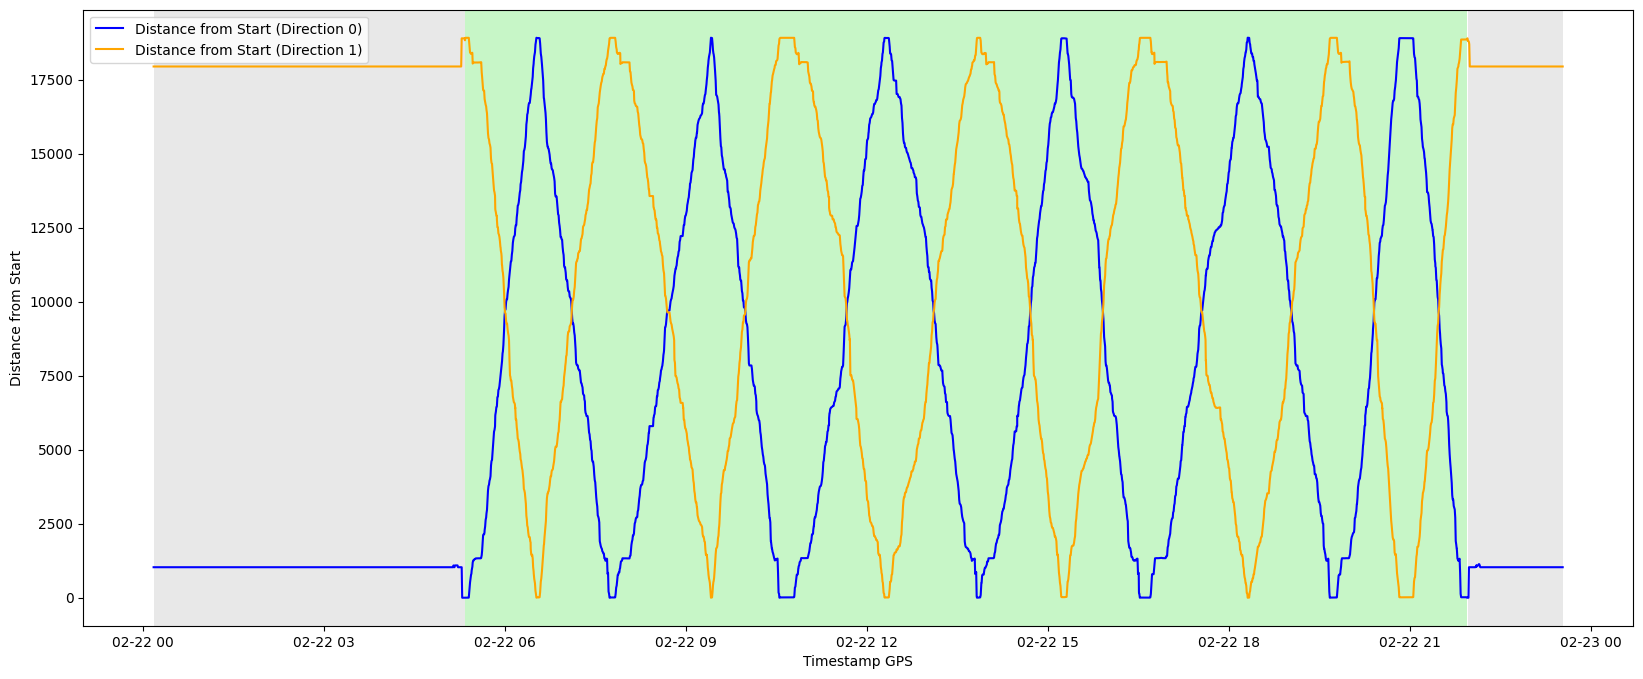

In [62]:
# Assuming gps.gps_df is your DataFrame and it's already loaded
df = gps.gps_df

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'in_route' column and create a colormap
colors = {True: 'lightgreen', False: 'lightgrey'}  # Modify colors as needed

# Group by 'in_route' status and apply coloring
in_route = df['in_route'].to_numpy()

# Find indices where 'in_route' changes
change_indices = np.where(in_route[:-1] != in_route[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(in_route)]))

# Apply coloring to the background based on 'in_route' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[in_route[start]], alpha=0.5)

# Add legend and labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')
ax.legend()

# Show plot
plt.show()

In [63]:
# Assign the direction and direction inference to each GPS point
df['direction'], df['direction_directly_infered'] = utils.assign_direction(df['in_route'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy(), N=8)

df['direction_directly_infered'].value_counts()

direction_directly_infered
True     2210
False     370
Name: count, dtype: int64

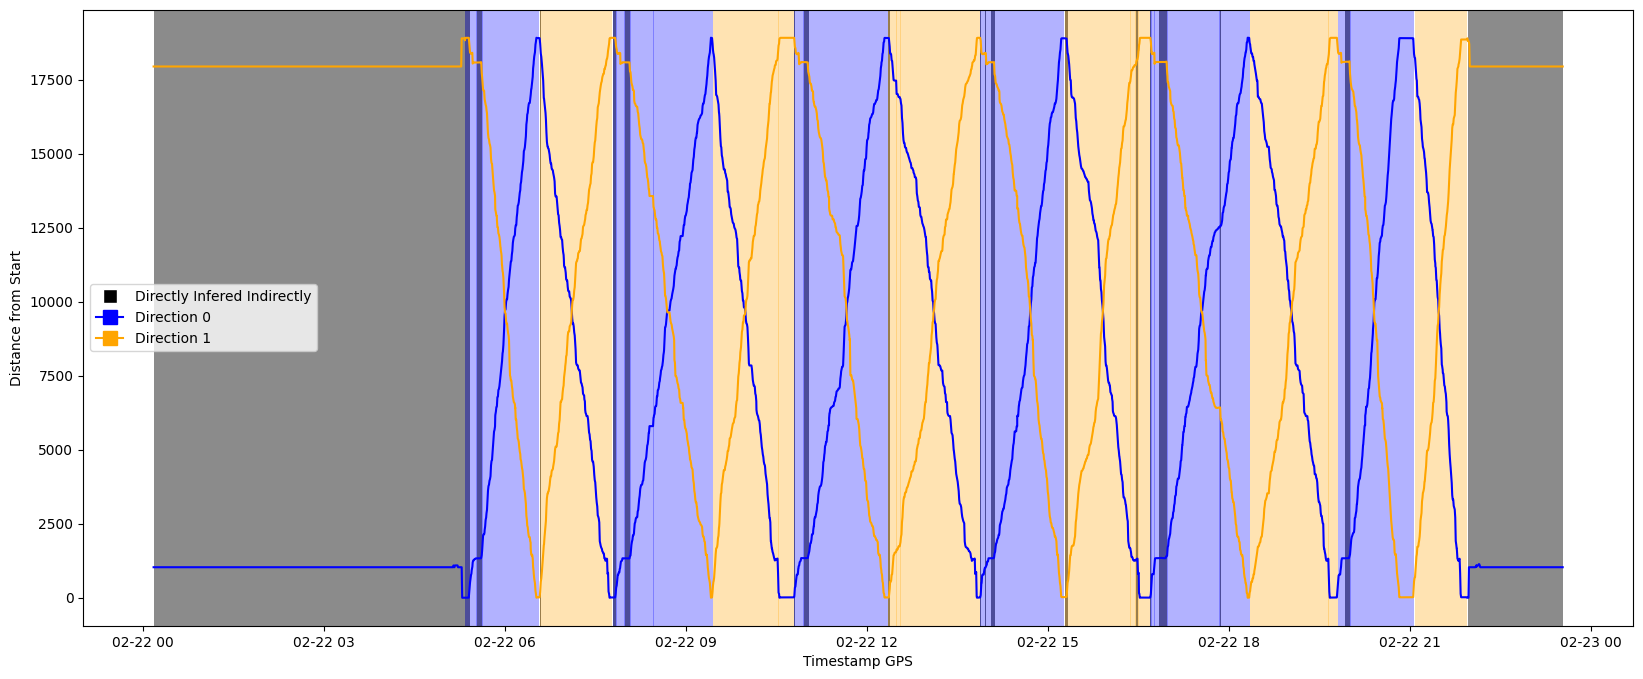

-1: [0:127]
0: [127:303]
1: [303:476]
0: [476:719]
1: [719:887]
0: [887:1125]
1: [1125:1347]
0: [1347:1546]
1: [1546:1751]
0: [1751:1998]
1: [1998:2188]
0: [2188:2354]
1: [2354:2482]
-1: [2482:2580]


In [64]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [65]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [66]:
gtfs.get_stops_by_direction()

In [67]:
gtfs.stops_by_direction

[      stop_sequence       stop_id  stop_distance  direction_id shape_id  \
 0                 0  2033O00100C0           0.00             0     gnoq   
 57                1  2033O00211C0         354.51             0     gnoq   
 88                2  2033O00212C0         636.83             0     gnoq   
 119               3  2033O00177C0        1255.20             0     gnoq   
 150               4  2033O00181C0        1715.36             0     gnoq   
 ...             ...           ...            ...           ...      ...   
 1855             59  2028O00018C0       17884.95             0     gnoq   
 1886             60  2028O00019C0       18146.96             0     gnoq   
 1917             61  2028O00020C0       18270.31             0     gnoq   
 1948             62  2028O00021C0       18452.15             0     gnoq   
 1979             63  2028O00001C0       18913.66             0     gnoq   
 
                                  stop_name   stop_lat   stop_lon  \
 0     Ponto Fina

In [68]:
gtfs.stops_distances_by_direction

[array([    0.  ,   354.51,   636.83,  1255.2 ,  1715.36,  1928.52,
         2118.75,  2398.78,  2635.71,  2916.32,  3157.51,  3438.28,
         3780.63,  3932.73,  4297.04,  4616.7 ,  4912.81,  5164.51,
         5607.03,  6227.58,  6441.58,  6816.3 ,  7006.32,  7284.34,
         7478.45,  7700.13,  7991.87,  8236.1 ,  8692.06,  9135.26,
         9394.19,  9695.1 ,  9968.64, 10201.03, 10351.09, 10480.63,
        10888.38, 11053.36, 11473.67, 11659.9 , 12217.91, 12582.09,
        12991.72, 13259.19, 13534.4 , 13728.36, 13986.49, 14338.3 ,
        14801.07, 15187.22, 15439.34, 15701.68, 16017.13, 16321.33,
        16759.65, 16971.07, 17155.34, 17516.3 , 17702.51, 17884.95,
        18146.96, 18270.31, 18452.15, 18913.66]),
 array([    0.  ,   538.15,   648.  ,   765.24,   990.16,  1175.79,
         1400.99,  1594.27,  2047.21,  2394.54,  2656.59,  2948.01,
         3296.92,  3521.03,  3882.85,  4288.67,  4611.26,  4764.49,
         5072.04,  5371.83,  5651.31,  5772.71,  6030.84,  6640.92

In [69]:
df['distance_traveled'], df['cumulative_distance_traveled'] = utils.assign_distance_traveled(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy())

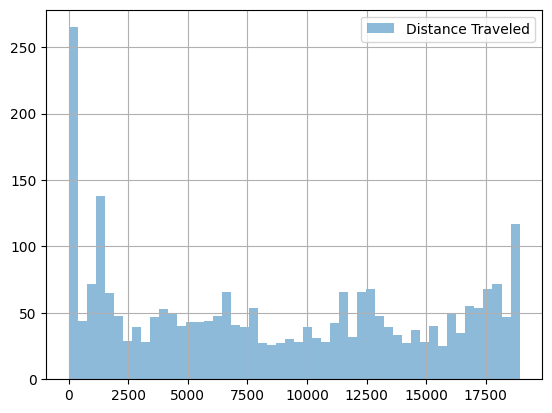

In [70]:
# Plot a histogram of the distance traveled
df['distance_traveled'].hist(bins=50, alpha=0.5, label='Distance Traveled')

plt.legend()
plt.show()

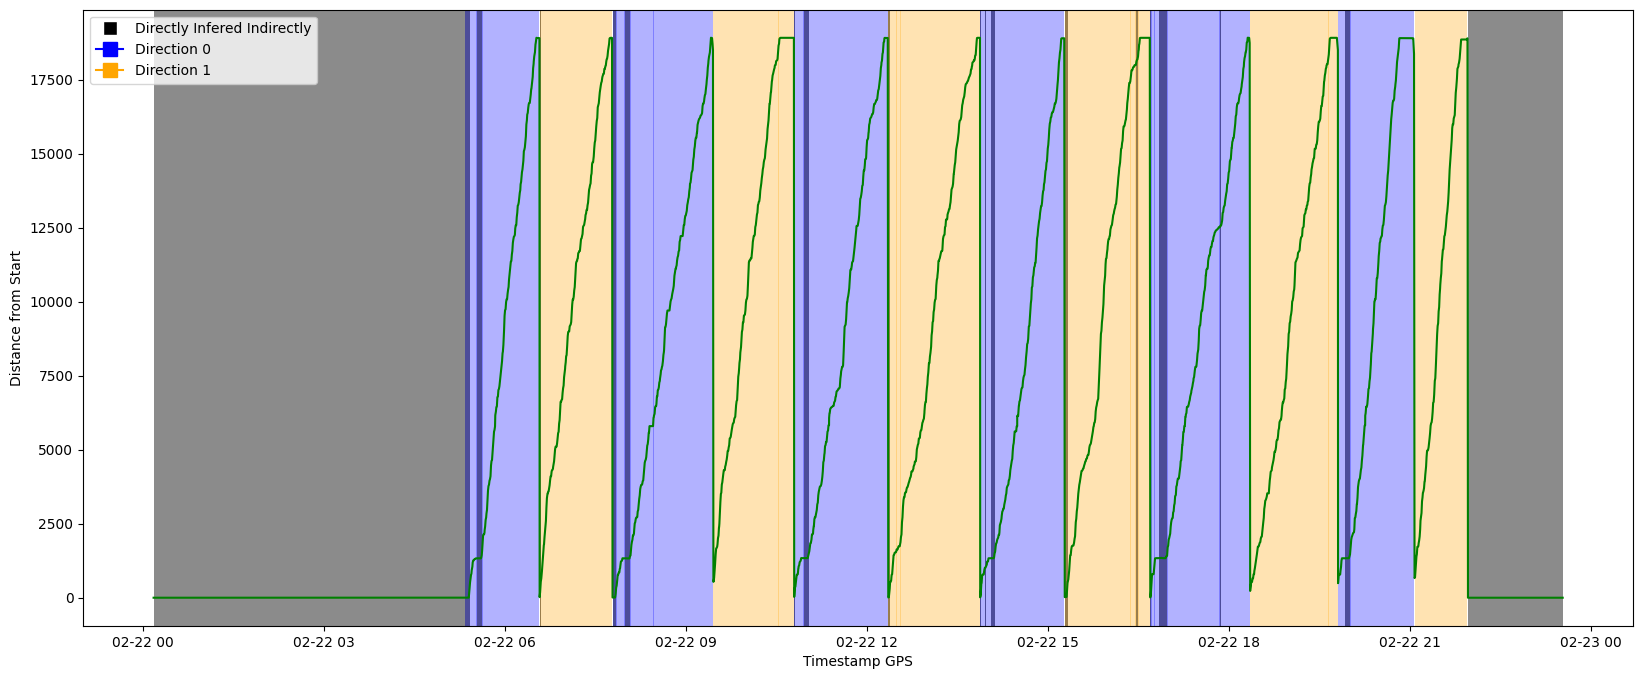

-1: [0:127]
0: [127:303]
1: [303:476]
0: [476:719]
1: [719:887]
0: [887:1125]
1: [1125:1347]
0: [1347:1546]
1: [1546:1751]
0: [1751:1998]
1: [1998:2188]
0: [2188:2354]
1: [2354:2482]
-1: [2482:2580]


In [71]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_traveled = df['distance_traveled'].to_numpy()

ax.plot(timestamp, distance_traveled, label='Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

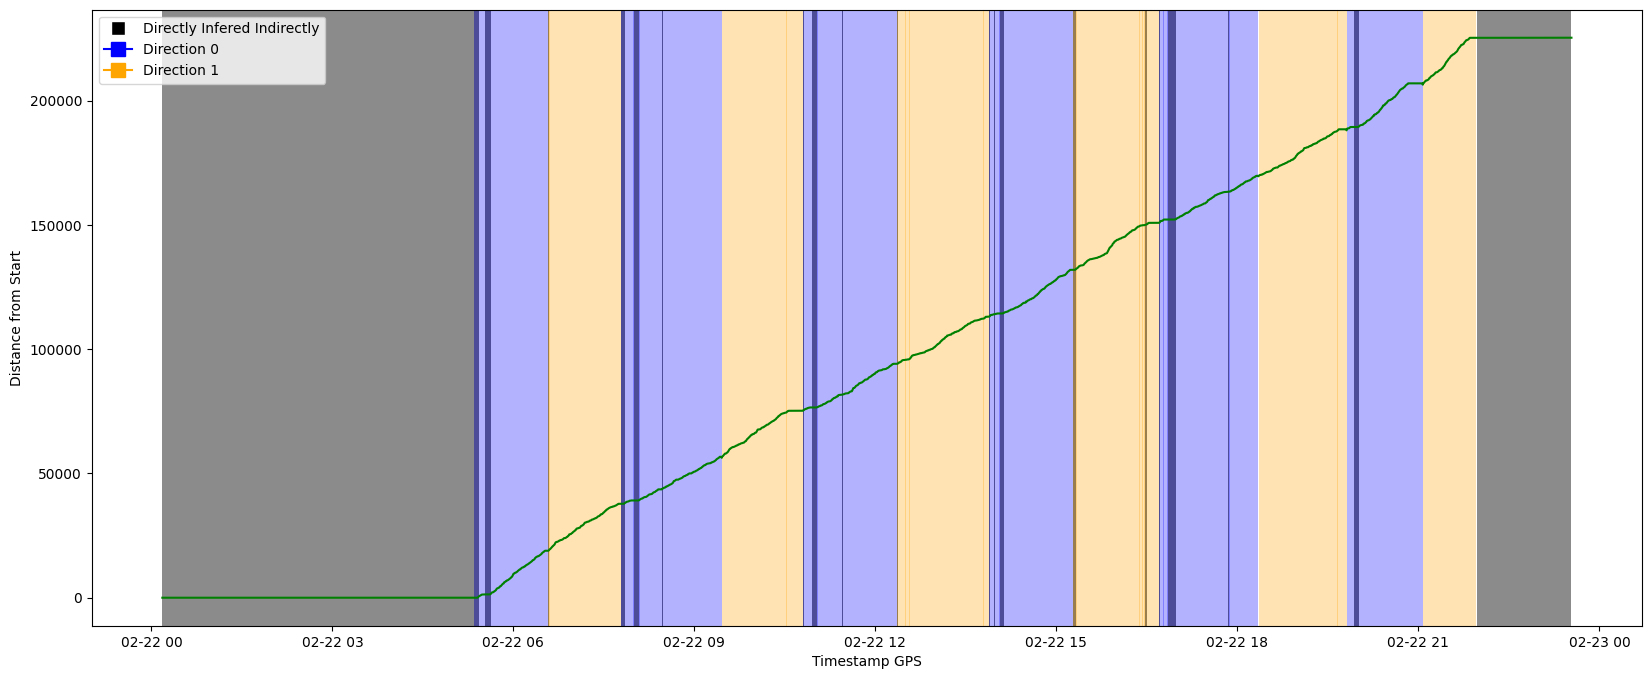

-1: [0:127]
0: [127:303]
1: [303:476]
0: [476:719]
1: [719:887]
0: [887:1125]
1: [1125:1347]
0: [1347:1546]
1: [1546:1751]
0: [1751:1998]
1: [1998:2188]
0: [2188:2354]
1: [2354:2482]
-1: [2482:2580]


In [72]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
cumulative_distance_traveled = df['cumulative_distance_traveled'].to_numpy()

ax.plot(timestamp, cumulative_distance_traveled, label='Cumulative Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [73]:
df['cumulative_distance_traveled']

36161         0.000000
7169          0.000000
15            0.000000
43358         0.000000
43353         0.000000
             ...      
36159    225334.898438
66480    225334.898438
8233     225334.898438
58015    225334.898438
43355    225334.898438
Name: cumulative_distance_traveled, Length: 2580, dtype: float64